# OXT - OXTR model


### Here, we are defining the ode model to perform simulation for surface level HEK293 cells data provided by lab


In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import csv


In [3]:
# OXT and OXTR binding code for wild type

def oxtmodel(x, t):
    
#     kon = 1.46e+5 # per molar per sec
#     koff = 8.3e-5 # per sec
    kon = 8.8e+6 # per molar per min (from gulliver thesis)
    koff = 0.005 # per min (from gulliver thesis)
    #kon = 5.28e+8 # per molar per hr (from gulliver thesis)
    #koff = 0.3 # per hr (from gulliver thesis)
    
    Av = 6e+23
    V = 1e-12 # litre It is HEK293 cells volume given as 1046 cubic micro meter in the paper
    Div = V*Av  # dividend of the oxtr copies 
    oxt = x[0]
    oxtr = x[1]
    oxr = x[2]
   
    
    doxtdt = -kon*oxt*(oxtr) + koff*oxr
    doxtrdt = -kon*oxt*(oxtr) + koff*oxr
    doxrdt = kon*oxt*(oxtr) -koff*oxr

    return(doxtrdt, doxtrdt, doxrdt)


initial_t = 0
end_t =1
num = 100
Av = 6e+23
V = 1e-12 # litre It is HEK293 cells volume given as 1046 cubic micro meter in the paper
Div = V*Av
# oxtr conc is x copies/cell
# we need to get the molar concetration of oxtr in mol/litre
# conc. = N/V = x/1e-12

# molar concentration c = conc/NA = x/(1e-12*6e+23) mol/L 



# initial condition for wild type 
x0_wt = [1e-6, 2.54e-7, 0]
# initial condition for mutants V281M
x0_v281m = [1e-6, 1.28e-7, 0]
# initial condition for mutants P108A
x0_p108a = [1e-6, 3.1e-7, 0]
# initial condition for mutants L206V
x0_l206v = [1e-6, 3.55e-7, 0]
# initial condition for mutants V45L
x0_v45l = [1e-6, 2.37e-7, 0]
# initial condition for mutants E339K
x0_e339k = [1e-6, 1.69e-7, 0]

# time span
t = np.linspace(initial_t, end_t, num)

# ode integration for all types 
x_wt = odeint(oxtmodel,x0_wt,t)   
x_v281m = odeint(oxtmodel,x0_v281m,t)   
x_p108a = odeint(oxtmodel,x0_p108a,t)   
x_l206v = odeint(oxtmodel,x0_l206v,t)   
x_v45l = odeint(oxtmodel,x0_v45l,t)   
x_e339k = odeint(oxtmodel,x0_e339k,t) 



# solution extraction for wild type
oxt_wt = x_wt[:, 0]
oxtr_wt = x_wt[:, 1]
oxr_wt = x_wt[:, 2]

oxt_wt_c = oxt_wt*Div
oxtr_wt_c = oxtr_wt*Div
oxr_wt_c = oxr_wt*Div

# solution extraction for mutant V281M

oxt_v281m = x_v281m[:, 0]
oxtr_v281m = x_v281m[:, 1]
oxr_v281m = x_v281m[:, 2]

oxt_v281m_c = oxt_v281m*Div
oxtr_v281m_c = oxtr_v281m*Div
oxr_v281m_c = oxr_v281m*Div

# solution extraction for mutant P108A

oxt_p108a = x_p108a[:, 0]
oxtr_p108a = x_p108a[:, 1]
oxr_p108a = x_p108a[:, 2]

oxt_p108a_c = oxt_p108a*Div
oxtr_p108a_c = oxtr_p108a*Div
oxr_p108a_c = oxr_p108a*Div


# solution extraction for mutant L206V

oxt_l206v = x_l206v[:, 0]
oxtr_l206v = x_l206v[:, 1]
oxr_l206v = x_l206v[:, 2]

oxt_l206v_c = oxt_l206v*Div
oxtr_l206v_c = oxtr_l206v*Div
oxr_l206v_c = oxr_l206v*Div

# solution extraction for mutant V45L

oxt_v45l = x_v45l[:, 0]
oxtr_v45l = x_v45l[:, 1]
oxr_v45l = x_v45l[:, 2]

oxt_v45l_c = oxt_v45l*Div
oxtr_v45l_c = oxtr_v45l*Div
oxr_v45l_c = oxr_v45l*Div
# solution extraction for mutant E339K

oxt_e339k = x_e339k[:, 0]
oxtr_e339k = x_e339k[:, 1]
oxr_e339k = x_e339k[:, 2]

oxt_e339k_c = oxt_e339k*Div
oxtr_e339k_c = oxtr_e339k*Div
oxr_e339k_c = oxr_e339k*Div

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
fig.subplots_adjust(right=0.5)


twin1 = ax.twinx()


# l1, = ax.plot(t, oxr_l206v/1e-6, ':', linewidth=4, color='blue', label='OxR (L206V)')
# l2, = twin1.plot(t, oxr_l206v_c, ':', linewidth=4, color='blue', label='OxR (L206V)')
# p1, = ax.plot(t, oxr_p108a/1e-6, '-.', linewidth=4, color='green', label='OxR (P108A)')
# p2, = twin1.plot(t, oxr_p108a_c, '-.', linewidth=4, color='green', label='OxR (P108A)')
# w1, = ax.plot(t, oxr_wt/1e-6, '-', linewidth=4, color='black', label='OxR (WT)')
# w2, = twin1.plot(t, oxr_wt_c, '-', linewidth=4, color='black', label='OxR (WT)')
# v41, = ax.plot(t, oxr_v45l/1e-6, '.', linewidth=4, color='purple', label='OxR (V45L)')
# v42, = twin1.plot(t, oxr_v45l_c, '.', linewidth=4, color='purple', label='OxR (V45L)')
# e1,  = ax.plot(t, oxr_e339k/1e-6, 'o', linewidth=4, color='magenta', label='OxR (E339K)')
# e2,  = twin1.plot(t, oxr_e339k_c, 'o', linewidth=4, color='magenta', label='OxR (E339K)')
# v1, = ax.plot(t, oxr_v281m/1e-6, '--', linewidth=4, color='red', label='OxR (V281M)')
# v2, = twin1.plot(t, oxr_v281m_c, '--', linewidth=4, color='red', label='OxR (V281M)')

l1, = ax.plot(t, oxr_l206v/1e-12, ':', linewidth=4, color='blue', label='OxR (L206V)')
l2, = twin1.plot(t, oxr_l206v_c, ':', linewidth=4, color='blue', label='OxR (L206V)')
p1, = ax.plot(t, oxr_p108a/1e-12, '-.', linewidth=4, color='green', label='OxR (P108A)')
p2, = twin1.plot(t, oxr_p108a_c, '-.', linewidth=4, color='green', label='OxR (P108A)')
w1, = ax.plot(t, oxr_wt/1e-12, '-', linewidth=4, color='black', label='OxR (WT)')
w2, = twin1.plot(t, oxr_wt_c, '-', linewidth=4, color='black', label='OxR (WT)')
v41, = ax.plot(t, oxr_v45l/1e-12, '.', linewidth=4, color='purple', label='OxR (V45L)')
v42, = twin1.plot(t, oxr_v45l_c, '.', linewidth=4, color='purple', label='OxR (V45L)')
e1,  = ax.plot(t, oxr_e339k/1e-12, 'o', linewidth=4, color='magenta', label='OxR (E339K)')
e2,  = twin1.plot(t, oxr_e339k_c, 'o', linewidth=4, color='magenta', label='OxR (E339K)')
v1, = ax.plot(t, oxr_v281m/1e-12, '--', linewidth=4, color='red', label='OxR (V281M)')
v2, = twin1.plot(t, oxr_v281m_c, '--', linewidth=4, color='red', label='OxR (V281M)')



# l1, = ax.plot(t, oxr_l206v/1e-9, ':', linewidth=4, color='blue', label='L206V')
# l2, = twin1.plot(t, oxr_l206v_c, ':', linewidth=4, color='blue', label='L206V')
# p1, = ax.plot(t, oxr_p108a/1e-9, '-.', linewidth=4, color='green', label='P108A')
# p2, = twin1.plot(t, oxr_p108a_c, '-.', linewidth=4, color='green', label='P108A')
# w1, = ax.plot(t, oxr_wt/1e-9, '-', linewidth=4, color='black', label='Wild-type')
# w2, = twin1.plot(t, oxr_wt_c, '-', linewidth=4, color='black', label='Wild-type')
# v41, = ax.plot(t, oxr_v45l/1e-9, '.', linewidth=4, color='purple', label='V45L')
# v42, = twin1.plot(t, oxr_v45l_c, '.', linewidth=4, color='purple', label='V45L')
# e1,  = ax.plot(t, oxr_e339k/1e-9, 'o', linewidth=4, color='magenta', label='E339K')
# e2,  = twin1.plot(t, oxr_e339k_c, 'o', linewidth=4, color='magenta', label='E339K')
# v1, = ax.plot(t, oxr_v281m/1e-9, '--', linewidth=4, color='red', label='V281M')
# v2, = twin1.plot(t, oxr_v281m_c, '--', linewidth=4, color='red', label='V281M')



#ax.set_xlim(0, 5)
#ax.set_ylim(6, 12)
#twin1.set_ylim(60000, 80000)


ax.set_xlabel("Time (min)", fontsize=18, fontweight='bold')
#ax.set_xlabel("Time (min)", fontsize=18, fontweight='bold')
#ax.set_ylabel("[Bound OXTR Complex] ($\mu$M)", fontsize=18, fontweight='bold')
ax.set_ylabel("[OXTR Complex] (pM)", fontsize=18, fontweight='bold')
twin1.set_ylabel("[OXTR Complex] (complexes/cell)", fontsize=18, fontweight='bold')
#ax.set_title("Tranfected HEK293 Cells", fontsize=18, fontweight='bold')
ax.set_yticks(np.arange(0, 0.4*1e+6, 0.025*1e+6))
twin1.set_yticks(np.arange(0, 240000, 25000))

#plt.yticks(fontsize=20)
#ax.yaxis.label.set_color(p1.get_color('black'))
#twin1.yaxis.label.set_color(p2.get_color('black'))
#twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=5, width=2, labelsize=18)
ax.tick_params(axis='both',  **tkw)
twin1.tick_params(axis='both',  **tkw)
# twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
# ax.tick_params(axis='x', **tkw)
ax.legend(handles=[l1,p1, w1, v41, e1, v1], fontsize=18, loc='center left', bbox_to_anchor=(1.3, 0.8))
#ax.legend(handles=[l1,p1, w1, v41, e1, v1], fontsize=18)
#plt.savefig("oxt_com_conc_hek_microm.jpg", dpi=400, bbox_inches='tight')
plt.savefig("oxtrc_hek_equil_1microm_pm.jpg", dpi=400, bbox_inches='tight')
#plt.savefig("oxt_com_conc_hek_60min.jpg", dpi=400, bbox_inches='tight')
#plt.savefig("oxt_com_conc_hek_hr.jpg", dpi=400, bbox_inches='tight')
plt.show()


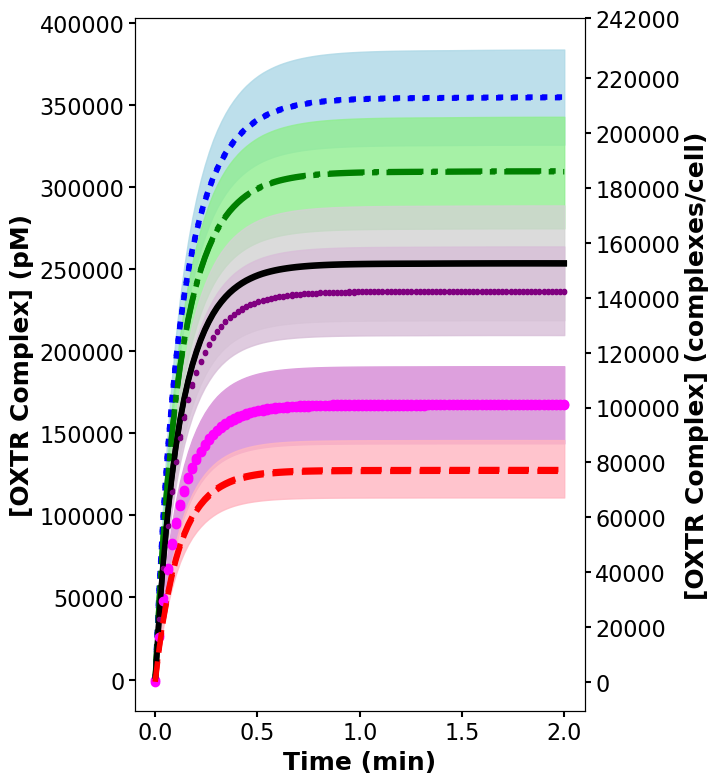

In [7]:


# OXT and OXTR binding code for wild type and it's standard error


import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import csv


def oxtmodel(x, t):
    
    kon = 8.8e+6 # per molar per min (from gulliver thesis)
    koff = 0.005 # per min (from gulliver thesis) 
    Av = 6e+23
    V = 1e-12 # litre It is given as 14047 cubic micro meter 
    Div = V*Av  # dividend of the oxtr copies 
    oxt = x[0]
    oxtr = x[1]
    oxr = x[2]
   
    
    doxtdt = -kon*oxt*(oxtr) + koff*oxr
    doxtrdt = -kon*oxt*(oxtr) + koff*oxr
    doxrdt = kon*oxt*(oxtr) -koff*oxr

    return(doxtrdt, doxtrdt, doxrdt)


initial_t = 0
end_t = 2
num = 100
Av = 6e+23
V = 1e-12 # litre It is HEK293 cells volume given as 1046 cubic micro meter in the paper
Div = V*Av



# initial condition for wild type mean, upper bound and lower bound
#x0_wt = [1e-8, 2.38678e-9, 0]
x0_wt = [1e-6, 2.54e-7, 0]
x0_wtub = [1e-6, 2.89e-7, 0]
x0_wtlb = [1e-6, 2.19e-7, 0]
# initial condition for mutant V281M
x0_v281m = [1e-6, 1.28e-7, 0]
x0_v281mub = [1e-6, 1.46e-7, 0]
x0_v281mlb = [1e-6, 1.11e-7, 0]
# initial condition for mutant P108A
x0_p108a = [1e-6, 3.1e-7, 0]
x0_p108aub = [1e-6, 3.43e-7, 0]
x0_p108alb = [1e-6, 2.75e-7, 0]
# initial condition for mutant L206V
x0_l206v = [1e-6, 3.55e-7, 0]
x0_l206vub = [1e-6, 3.84e-7, 0]
x0_l206vlb = [1e-6, 3.26e-7, 0]
# initial condition for mutant V45L
x0_v45l = [1e-6, 2.37e-7, 0]
x0_v45lub = [1e-6, 2.64e-7, 0]
x0_v45llb = [1e-6, 2.10e-7, 0]
# initial condition for mutant E339K
x0_e339k = [1e-6, 1.68e-7, 0]
x0_e339kub = [1e-6, 1.91e-7, 0]
x0_e339klb = [1e-6, 1.44e-7, 0]


# time span
t = np.linspace(initial_t, end_t, num)

# ode integration for all types 
x_wt = odeint(oxtmodel,x0_wt,t)   
x_wtub = odeint(oxtmodel,x0_wtub,t)   
x_wtlb = odeint(oxtmodel,x0_wtlb,t) 

x_v281m = odeint(oxtmodel,x0_v281m,t)  
x_v281mub = odeint(oxtmodel,x0_v281mub,t)   
x_v281mlb = odeint(oxtmodel,x0_v281mlb,t)  

x_p108a = odeint(oxtmodel,x0_p108a,t)   
x_p108aub = odeint(oxtmodel,x0_p108aub,t)   
x_p108alb = odeint(oxtmodel,x0_p108alb,t)

x_l206v = odeint(oxtmodel,x0_l206v,t)   
x_l206vub = odeint(oxtmodel,x0_l206vub,t)   
x_l206vlb = odeint(oxtmodel,x0_l206vlb,t)  

x_v45l = odeint(oxtmodel,x0_v45l,t)   
x_v45lub = odeint(oxtmodel,x0_v45lub,t)   
x_v45llb = odeint(oxtmodel,x0_v45llb,t) 

x_e339k = odeint(oxtmodel,x0_e339k,t)   
x_e339kub = odeint(oxtmodel,x0_e339kub,t)   
x_e339klb = odeint(oxtmodel,x0_e339klb,t)   




# solution extraction for wild type oxr complex
oxt_wt = x_wt[:, 0]
oxtr_wt = x_wt[:, 1]
oxr_wt = x_wt[:, 2]

oxt_wt_c = oxt_wt*Div
oxtr_wt_c = oxtr_wt*Div
oxr_wt_c = oxr_wt*Div

# solution extraction for wt upper bound

oxt_wtub = x_wtub[:, 0]
oxtr_wtub = x_wtub[:, 1]
oxr_wtub = x_wtub[:, 2]

oxt_wtub_c = oxt_wtub*Div
oxtr_wtub_c = oxtr_wtub*Div
oxr_wtub_c = oxr_wtub*Div

# solution extraction for wt lower bound

oxt_wtlb = x_wtlb[:, 0]
oxtr_wtlb = x_wtlb[:, 1]
oxr_wtlb = x_wtlb[:, 2]

oxt_wtlb_c = oxt_wtlb*Div
oxtr_wtlb_c = oxtr_wtlb*Div
oxr_wtlb_c = oxr_wtlb*Div

# solution extraction for V281M 
oxt_v281m = x_v281m[:, 0]
oxtr_v281m = x_v281m[:, 1]
oxr_v281m = x_v281m[:, 2]

oxt_v281m_c = oxt_v281m*Div
oxtr_v281m_c = oxtr_v281m*Div
oxr_v281m_c = oxr_v281m*Div

# solution extraction for v281m upper bound

oxt_v281mub = x_v281mub[:, 0]
oxtr_v281mub = x_v281mub[:, 1]
oxr_v281mub = x_v281mub[:, 2]

oxt_v281mub_c = oxt_v281mub*Div
oxtr_v281mub_c = oxtr_v281mub*Div
oxr_v281mub_c = oxr_v281mub*Div

# solution extraction for v281m lower bound

oxt_v281mlb = x_v281mlb[:, 0]
oxtr_v281mlb = x_v281mlb[:, 1]
oxr_v281mlb = x_v281mlb[:, 2]

oxt_v281mlb_c = oxt_v281mlb*Div
oxtr_v281mlb_c = oxtr_v281mlb*Div
oxr_v281mlb_c = oxr_v281mlb*Div 


# solution extraction for P108A 
oxt_p108a = x_p108a[:, 0]
oxtr_p108a = x_p108a[:,1]
oxr_p108a = x_p108a[:, 2]

oxt_p108a_c = oxt_p108a*Div
oxtr_p108a_c = oxtr_p108a*Div
oxr_p108a_c = oxr_p108a*Div

# solution extraction for p108a upper bound

oxt_p108aub = x_p108aub[:, 0]
oxtr_p108aub = x_p108aub[:,1]
oxr_p108aub = x_p108aub[:, 2]

oxt_p108aub_c = oxt_p108aub*Div
oxtr_p108aub_c = oxtr_p108aub*Div
oxr_p108aub_c = oxr_p108aub*Div

# solution extraction for p108a lower bound

oxt_p108alb = x_p108alb[:, 0]
oxtr_p108alb = x_p108alb[:, 1]
oxr_p108alb = x_p108alb[:, 2]

oxt_p108alb_c = oxt_p108alb*Div
oxtr_p108alb_c = oxtr_p108alb*Div
oxr_p108alb_c = oxr_p108alb*Div

# solution extraction for L206V 
oxt_l206v = x_l206v[:, 0]
oxtr_l206v = x_l206v[:,1]
oxr_l206v = x_l206v[:, 2]

oxt_l206v_c = oxt_l206v*Div
oxtr_l206v_c = oxtr_l206v*Div
oxr_l206v_c = oxr_l206v*Div

# solution extraction for l206v upper bound

oxt_l206vub = x_l206vub[:, 0]
oxtr_l206vub = x_l206vub[:,1]
oxr_l206vub = x_l206vub[:, 2]

oxt_l206vub_c = oxt_l206vub*Div
oxtr_l206vub_c = oxtr_l206vub*Div
oxr_l206vub_c = oxr_l206vub*Div

# solution extraction for l206v lower bound

oxt_l206vlb = x_l206vlb[:, 0]
oxtr_l206vlb = x_l206vlb[:, 1]
oxr_l206vlb = x_l206vlb[:, 2]

oxt_l206vlb_c = oxt_l206vlb*Div
oxtr_l206vlb_c = oxtr_l206vlb*Div
oxr_l206vlb_c = oxr_l206vlb*Div


# solution extraction for V45L 
oxt_v45l = x_v45l[:, 0]
oxtr_v45l = x_v45l[:,1]
oxr_v45l = x_v45l[:, 2]

oxt_v45l_c = oxt_v45l*Div
oxtr_v45l_c = oxtr_v45l*Div
oxr_v45l_c = oxr_v45l*Div

# solution extraction for v45l upper bound

oxt_v45lub = x_v45lub[:, 0]
oxtr_v45lub = x_v45lub[:,1]
oxr_v45lub = x_v45lub[:, 2]

oxt_v45lub_c = oxt_v45lub*Div
oxtr_v45lub_c = oxtr_v45lub*Div
oxr_v45lub_c = oxr_v45lub*Div

# solution extraction for v45l lower bound

oxt_v45llb = x_v45llb[:, 0]
oxtr_v45llb = x_v45llb[:, 1]
oxr_v45llb = x_v45llb[:, 2]

oxt_v45llb_c = oxt_v45llb*Div
oxtr_v45llb_c = oxtr_v45llb*Div
oxr_v45llb_c = oxr_v45llb*Div

# solution extraction for E339K 
oxt_e339k = x_e339k[:, 0]
oxtr_e339k = x_e339k[:,1]
oxr_e339k = x_e339k[:, 2]

oxt_e339k_c = oxt_e339k*Div
oxtr_e339k_c = oxtr_e339k*Div
oxr_e339k_c = oxr_e339k*Div

# solution extraction for e3312k upper bound

oxt_e339kub = x_e339kub[:, 0]
oxtr_e339kub = x_e339kub[:,1]
oxr_e339kub = x_e339kub[:, 2]

oxt_e339kub_c = oxt_e339kub*Div
oxtr_e339kub_c = oxtr_e339kub*Div
oxr_e339kub_c = oxr_e339kub*Div

# solution extraction for e3312k lower bound

oxt_e339klb = x_e339klb[:, 0]
oxtr_e339klb = x_e339klb[:, 1]
oxr_e339klb = x_e339klb[:, 2]

oxt_e339klb_c = oxt_e339klb*Div
oxtr_e339klb_c = oxtr_e339klb*Div
oxr_e339klb_c = oxr_e339klb*Div




fig, ax = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(12)
fig.subplots_adjust(right=0.5)


twin1 = ax.twinx()




l1, = ax.plot(t, oxr_l206v/1e-12, ':', linewidth=4, color='blue', label='L206V')
l2, = twin1.plot(t, oxr_l206v_c, ':', linewidth=4, color='blue', label='L206V')
l3 = ax.fill_between(t, oxr_l206vub/1e-12, oxr_l206vlb/1e-12, color='lightblue', alpha=0.8)
p1, = ax.plot(t, oxr_p108a/1e-12, '-.', linewidth=4, color='green', label='P108A')
p2, = twin1.plot(t, oxr_p108a_c, '-.', linewidth=4, color='green', label='P108A')
p3 = ax.fill_between(t, oxr_p108aub/1e-12, oxr_p108alb/1e-12,color='lightgreen', alpha=0.8)
w1, = ax.plot(t, oxr_wt/1e-12, '-', linewidth=4, color='black', label='Wild-type')
w2, = twin1.plot(t, oxr_wt_c, '-', linewidth=4, color='black', label='Wild-type')
w3 = ax.fill_between(t, oxr_wtub/1e-12, oxr_wtlb/1e-12, color='lightgray', alpha=0.8)
v41, = ax.plot(t, oxr_v45l/1e-12, '.', linewidth=4, color='purple', label='V45L')
v42, = twin1.plot(t, oxr_v45l_c, '.', linewidth=4, color='purple', label='V45L')
v43 = ax.fill_between(t, oxr_v45lub/1e-12, oxr_v45llb/1e-12, color='thistle', alpha=0.8)
e1,  = ax.plot(t, oxr_e339k/1e-12, 'o', linewidth=4, color='magenta', label='E339K')
e2,  = twin1.plot(t, oxr_e339k_c, 'o', linewidth=4, color='magenta', label='E339K')
e3 = ax.fill_between(t, oxr_e339kub/1e-12, oxr_e339klb/1e-12, color= 'plum')
v1, = ax.plot(t, oxr_v281m/1e-12, '--', linewidth=4, color='red', label='V281M')
v2, = twin1.plot(t, oxr_v281m_c, '--', linewidth=4, color='red', label='V281M')
v3 =  ax.fill_between(t, oxr_v281mub/1e-12, oxr_v281mlb/1e-12,color='lightpink', alpha=0.8)




ax.set_xlabel("Time (min)", fontsize=18, fontweight='bold')
ax.set_ylabel("[OXTR Complex] (pM)", fontsize=18, fontweight='bold')
twin1.set_ylabel("[OXTR Complex] (complexes/cell)", fontsize=18, fontweight='bold')
ax.set_yticks([0,  50000,  100000,  150000, 200000, 250000, 300000, 350000, 400000])
#ax.set_yticks([0,500,1000,1500,2000,2500,3050], fontsize=18, fontweight='bold')
twin1.set_yticks([0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,220000,242000])
#twin1.set_yticks([0,5000,10000,15000,20000,25620], fontsize=18, fontweight='bold')
#ax.set_yticks(np.arange(0, 3571.5, 500))
#twin1.set_yticks(np.arange(0, 30001, 2000))

#ax.yaxis.label.set_color(p1.get_color('black'))
#twin1.yaxis.label.set_color(p2.get_color('black'))
#twin2.yaxis.label.set_color(p3.get_color())
# ax.set_yticks(np.arange(0, 0.4*1e+6, 0.025*1e+6))
# twin1.set_yticks(np.arange(0, 240000, 25000))
tkw = dict(size=4, width=1.5, labelsize=16)
ax.tick_params(axis='both',  **tkw)
twin1.tick_params(axis='both',  **tkw)


#ax.legend(handles=[l1,p1, w1, v41, e1, v1], fontsize=18, loc='center left', bbox_to_anchor=(1.3, 0.8))

#ax.legend(handles=[l1,p1, w1, v41, e1, v1], fontsize=18, loc='best')
#plt.savefig("oxt_com_conc_myo_2min.jpg", dpi=400, bbox_inches='tight')
#plt.savefig("oxt_com_conc_myo_5min.jpg", dpi=400, bbox_inches='tight')
#plt.savefig("oxt_com_conc_myo_60min.jpg", dpi=400, bbox_inches='tight')
plt.savefig("oxtrc_hek_oxt_mircom_yaxis_pm.jpg", dpi=400, bbox_inches='tight')




plt.show()




    